In [1]:
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

%matplotlib inline

# Ex 2

In [2]:
def logistic_map_aux(x, r):
    return r*x*(1-x)

def logistic_map_recursive_aux(x, r, n, i=0):
    if n == i:
        return r*x*(1-x)

    else:
        return logistic_map_recursive_aux(r*x*(1-x), r, n, i+1)


In [3]:
logistic_map_aux(0.5, 5)

1.25

## Exploring logistic map

In [4]:

def iteractive_plot( r):
    fig, ax = plt.subplots(figsize=(10,7))

    # Get the values of our function and plot it
    x = np.linspace(0, 1, 100)
    y = [logistic_map_aux(i, r) for i in x]
    ax.plot(x, y)
    ax.set_ylabel('$Population_{n+1}$')
    ax.set_xlabel('$Population_{n}$')

    fig.tight_layout()
    #plt.legend()
    plt.show()
    return()

    
interact(iteractive_plot,r=(0,5,0.1))

interactive(children=(FloatSlider(value=2.0, description='r', max=5.0), Output()), _dom_classes=('widget-inter…

<function __main__.iteractive_plot(r)>

## Population over time

In [5]:

def iteractive_plot(x0, r):
    fig, ax = plt.subplots(figsize=(10,7))

    # Get the values of our function and plot it
    x = np.linspace(0, 50, 50)
    y = []
    previous = x0
    for i in x:
        actual = logistic_map_aux(previous, r)
        y.append(actual)
        previous = actual

    ax.plot(x, y, color='c')
    ax.plot(x, y, 'co')

    ax.set_ylabel('Population')
    ax.set_xlabel('Time')

    fig.tight_layout()
    #plt.legend()
    plt.show()
    return()

    
interact(iteractive_plot, x0=(0,1,0.1), r=(0,5,0.1),  resolution=(1,200,10))

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0), FloatSlider(value=2.0, description='r…

<function __main__.iteractive_plot(x0, r)>

## Ploting the Logistic Map

### METODO 1 - Simples, apenenas faz várias iterações e da plot ao ultimo valor

In [6]:

def iteractive_plot(x):
    fig, ax = plt.subplots(figsize=(10,7))

    # Get the values of our function and plot it
    r = np.linspace(0, 4, 100)
    x = [logistic_map_recursive_aux(x, i, 1000) for i in r]
    ax.plot(r, x, label="Logistic Map")


    fig.tight_layout()
    plt.legend()
    plt.show()
    return()

    
interact(iteractive_plot, x=(0,1,0.1))

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0), Output()), _dom_classes=('widget-inter…

<function __main__.iteractive_plot(x)>

## METODO 2

In [7]:
def logistic_map_aux(x, r):

    return r*x*(1-x)

def logistic_map_recursive(x, r, out_len, max_depth, iterations=0):

    if np.isinf(x):
        return []

    if max_depth <= iterations:
        retorno = []
        last = logistic_map_aux(x, r)
        for _ in range(out_len):
            current = logistic_map_aux(last, r)
            retorno.append(current)
            last = current
        return retorno

    else:
        return logistic_map_recursive(x=logistic_map_aux(x, r), r=r, out_len=out_len, max_depth=max_depth, iterations=iterations+1)

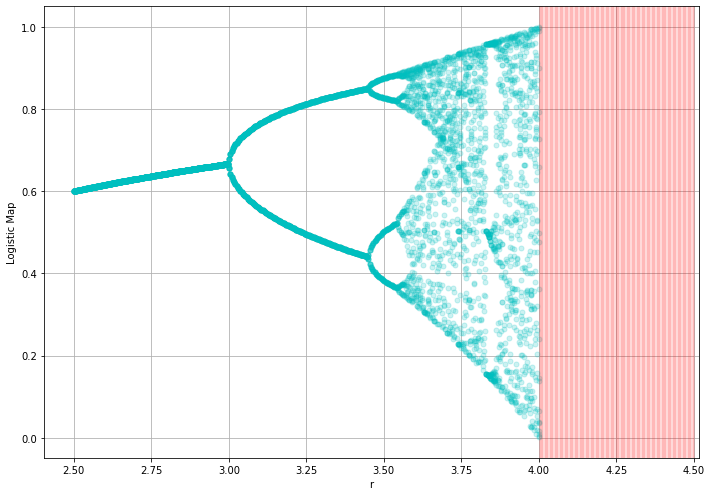

In [13]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

fig, ax = plt.subplots(figsize=(10,7))
x0 = 0.6
# Get the values of our function and plot it
r = np.linspace(2.5, 4.5, 500)

for i in r:
    values = logistic_map_recursive(x0, i, out_len=20, max_depth=1000)

    if values == []: # or np.isinf(values).any()
        plt.axvline(x=i, color='r', alpha=0.2)

    for value in values:
        plt.plot(i, value, 'co', markersize=5, alpha=0.2)


ax.set_xlabel('r')
ax.set_ylabel('Logistic Map')

fig.tight_layout()
plt.grid()
#plt.legend()
plt.show()